# Predicting Salary of an Employee

The given dataset contains information about work experience in years and corresponding salary of an employee. The goal is to create a model which can predict the salary based on employee years of experience.



In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Importing dataset

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

Checking if there is any null value present in the dataset

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Selecting features from dataFrame

In [7]:
X = df.iloc[:,:-1]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [8]:
y=df.iloc[:,1]
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

### Plotting the distribution of target variable

Text(0.5, 1.0, 'Salary ($)')

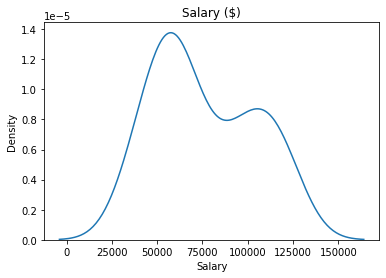

In [10]:
sns.kdeplot(df.Salary).set_title('Salary ($)')

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

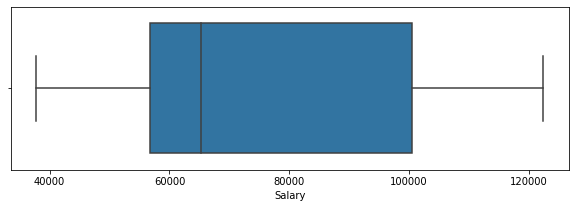

In [12]:
plt.figure(figsize = (10, 3))
sns.boxplot(df.Salary)

### Creating a scatter plot between Salary and Years of Experinece
From the below plot we can see that the target and input varibale are linearly related to each other. Since out target variable is continuous and realationship bewtween independent and dependent variable is linear, the Linear Regerssion model would be a best fit for prediction.

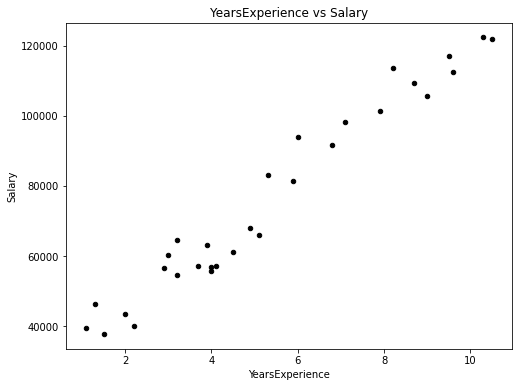

In [16]:
#plt.rcParams['axes.facecolor'] = 'w'
df.plot(kind="scatter",x="YearsExperience",y="Salary",color="black",figsize=(8,6))
plt.title("YearsExperience vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

Splitting the dataset into the Training set and Test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the salary using test data

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
y_t=y_test.values

In [21]:
y_final = y_t, np.round(y_pred,2)
y_final

(array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
         55794.,  83088., 101302.]),
 array([ 40835.11, 123079.4 ,  65134.56,  63265.37, 115602.65, 108125.89,
        116537.24,  64199.96,  76349.69, 100649.14]))

In [22]:
result = pd.DataFrame(list(y_final))
result

,0,1,2,3,4,5,6,7,8,9
0,37731.00,122391.0,57081.00,63218.00,116969.00,109431.00,112635.00,55794.00,83088.00,101302.00
1,40835.11,123079.4,65134.56,63265.37,115602.65,108125.89,116537.24,64199.96,76349.69,100649.14


Comparing Actual vs Predicted Salary

In [23]:
result = pd.DataFrame(list(y_final))
result = result.transpose()
result.columns = ["Actual Salary", "Predicted Salary"]
result.head(10)

,Actual Salary,Predicted Salary
0,37731.0,40835.11
1,122391.0,123079.40
2,57081.0,65134.56
3,63218.0,63265.37
4,116969.0,115602.65
5,109431.0,108125.89
6,112635.0,116537.24
7,55794.0,64199.96
8,83088.0,76349.69
9,101302.0,100649.14


### Visualising the Prediction Result

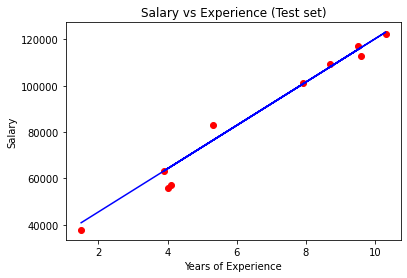

In [24]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

done